### **DATA AUGMENTATION**

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
import PIL 
import cv2 
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning)
import pathlib

**Importing dataset**

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

**Getting path of the dataset**

In [4]:
data_dir

'.\\datasets\\flower_photos'

**Getting windows path** 

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

**Length of all images** 

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

**Visualization of image**

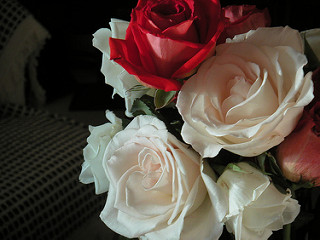

In [8]:
PIL.Image.open(str(roses[1]))

**Sorting all images by name**

In [10]:
flower_img_dict = { 
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'rose' : list(data_dir.glob('roses/*')),
    'sunflower' : list(data_dir.glob('sunflowers/*')),
    'tulip' : list(data_dir.glob('tulips/*'))
}

**Giving label to each image class**

In [12]:
flower_labels = { 
    'daisy': 0,
    'dandelion': 1,
    'rose': 2,
    'sunflower': 3,
    'tulip': 4 
}



In [13]:
img = cv2.imread(flower_img_dict['rose'][0])
img.shape

(240, 179, 3)

**Standardizing the image dimensions**

In [14]:
x , y = [], []

for flowername , images in flower_img_dict.items() : 
    for image in images : 
        img = cv2.imread(str(image))
        img = cv2.resize(img,(180,180))
        x.append(img)
        y.append(flower_labels[flowername])


In [15]:
x = np.array(x)
y = np.array(y)

**Splitting data into train and test**

In [16]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(f"x_train: {(x_train).shape}")
print(f"x_test: {(x_test).shape}")
print(f"y_train: {(y_train).shape}")
print(f"y_test: {(y_test).shape}")

x_train: (2936, 180, 180, 3)
x_test: (734, 180, 180, 3)
y_train: (2936,)
y_test: (734,)


**Scalling the data**

In [17]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [18]:
x_train_scale.shape

(2936, 180, 180, 3)

**Building model**

In [19]:
model = keras.Sequential(
    [
        #CNN 
        #16 filtes 3x3
        layers.Conv2D(16 ,3 , padding = 'same', activation="relu", input_shape=(180, 180, 3)),
        layers.MaxPooling2D((2, 2)),
        #32 filtes 3x3
        layers.Conv2D(32 ,3 , padding = 'same', activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        #64 filtes 3x3
        layers.Conv2D(64, 3,padding='same', activation="relu"),
        layers.MaxPooling2D((2, 2)),
        #ANN
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5, activation="softmax"),
    
    ]
)

model.compile(
       optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'] 
)

model.fit(x_train_scale , y_train, epochs=13)
model.summary()


c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13


c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.3229 - loss: 1.7356
Epoch 2/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 784ms/step - accuracy: 0.5756 - loss: 1.0426
Epoch 3/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 828ms/step - accuracy: 0.6739 - loss: 0.8426
Epoch 4/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 950ms/step - accuracy: 0.7735 - loss: 0.6217
Epoch 5/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 89s 964ms/step - accuracy: 0.8399 - loss: 0.4563
Epoch 6/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 89s 966ms/step - accuracy: 0.8999 - loss: 0.2928
Epoch 7/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 881ms/step - accuracy: 0.9526 - loss: 0.1543
Epoch 8/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 576ms/step - accuracy: 0.9627 - loss: 0.1234
Epoch 9/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 602ms/step - accuracy: 0.9869 - loss: 0.0527
Epoch 10/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 70s 758ms/step - accuracy: 0.9907 - loss: 0.0376
Epoch 11/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 633ms/step - accuracy: 0.9953 - loss: 0.0238
Epoch 12/13
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 601ms/step 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [21]:
model.evaluate(x_test_scale,y_test)

c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.5883 - loss: 2.5589


[2.428029775619507, 0.6049046516418457]

*as we can see that we are getting 99% accuracy or training data whereas on test data we are getting only 60% accuracy* 

**Recreating model with data augmentation**

In [25]:
DA = keras.Sequential(
    [   
        layers.RandomFlip("horizontal" , input_shape = (180 ,180 ,3)),
        layers.RandomZoom(.1),
        layers.RandomRotation(.1),

    ]
)


c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model = keras.Sequential(
    [
        #DataAugmentation layer 
        DA,
        #CNN 
        #16 filtes 3x3
        layers.Conv2D(16 ,3 , padding = 'same', activation="relu"),
        layers.MaxPooling2D((2, 2)),
        #32 filtes 3x3
        layers.Conv2D(32 ,3 , padding = 'same', activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        #64 filtes 3x3
        layers.Conv2D(64, 3,padding='same', activation="relu"),
        layers.MaxPooling2D((2, 2)),

        #ANN
        #dropping 20% nurons
        layers.Dropout(.25) ,
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(5, activation="softmax"),
    
    ]
)

model.compile(
       optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'] 
)

model.fit(x_train_scale , y_train, epochs=22)
model.summary()

c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22


c:\Users\13zer\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 954ms/step - accuracy: 0.3858 - loss: 1.4546
Epoch 2/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 872ms/step - accuracy: 0.5886 - loss: 1.0373
Epoch 3/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6423 - loss: 0.9208  
Epoch 4/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 822ms/step - accuracy: 0.6643 - loss: 0.8627
Epoch 5/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 697ms/step - accuracy: 0.6868 - loss: 0.8187
Epoch 6/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7098 - loss: 0.7363
Epoch 7/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7213 - loss: 0.7524
Epoch 8/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 985ms/step - accuracy: 0.7281 - loss: 0.6982
Epoch 9/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7421 - loss: 0.6618
Epoch 10/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 976ms/step - accuracy: 0.7630 - loss: 0.6391
Epoch 11/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 829ms/step - accuracy: 0.7751 - loss: 0.6067
Epoch 12/22
92/92 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [29]:
model.evaluate(x_test_scale,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.7210 - loss: 0.8444


[0.8980551362037659, 0.7166212797164917]

training accuracy decreased to 86% but evaluation accuracy increased to 72%